# Youtube Analytics Calculator

Welcome to the Youtube Analytics Calculator, a product by Owl Consultants LLC.

This program is designed for a user (that's you!) who is either an employee of Owl Consultants LLC or a client to help you to determine your Youtube Channel's likelihood of success.

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer as ct
import pickle
import logging
from datetime import datetime

channels_data = pd.read_csv("most_subscribed_youtube_channels.csv")

less_columns_model = pickle.load(open("Models/channels_data_model_less_columns.pkl", "rb"))
subscriber_model = pickle.load(open("Models/subsc_model.pkl", "rb"))

# Since this application is public and there is no data to keep secure, I included a user log for application uses
# to fulfill the industry standard security requirement.
users_log = open("Users_Log.txt", "a")
username = input("What should we call you? ")
users_log.write("User login: " + username + " - Date and Time: " + str(datetime.now()) + '\n')
print("Nice to meet you " + username + "! Let's get to work.")

What should we call you? Owl
Nice to meet you Owl! Let's get to work.


## Top 10 most successful Youtube channels as of October 2022

This table has information regarding the top 10 most successful Youtube Channels which has a lot of information which we will use to help you determine your channel's success. Although these are the top 10, we have included in our data the top 1000 channels to give you a more accurate calculation.

In [8]:
channels_data.head(10)

,Rank,Youtuber,Subscribers,Views,Videos,Category,Year
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013
5,6,PewDiePie,"111,000,000","28,469,458,228","4,497",Gaming,2010
6,7,MrBeast,"102,000,000","16,832,456,681",726,Entertainment,2012
7,8,✿ Kids Diana Show,"99,700,000","79,602,288,245","1,009",People & Blogs,2015
8,9,Like Nastya,"99,200,000","81,963,845,811",702,People & Blogs,2016
9,10,Gaming,"92,700,000",0,0,NaN,2013


In [9]:
# This cell is used to modify and clean data for use in the predictive models.

# Data modifiers to be able to use in prediction models.

channels_data["Rank"] = channels_data["Rank"].astype(int)
channels_data['Subscribers'] = channels_data['Subscribers'].str.replace(',', '').astype(int)
channels_data['Videos'] = channels_data['Videos'].str.replace(',','').astype(int)
channels_data['Views'] = channels_data['Views'].str.replace(',','').astype(float)

# Columns used for prediction models.
new_x = channels_data[["Subscribers", "Videos"]]
new_y = channels_data["Rank"]
subsc_x = channels_data["Subscribers"]
subsc_y = channels_data["Rank"]
new_sub_x = []

for i in subsc_x:
    new_sub_x.append([i])

# Accuracy Calculators
accuracy = less_columns_model.score(new_x, new_y)
accuracy = accuracy * 100
accuracy2 = subscriber_model.score(new_sub_x, subsc_y)
accuracy2 = accuracy2 * 100

C:\Users\jacob\Desktop\final_capstone\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Videos
Feature names seen at fit time, yet now missing:
- Views

  warnings.warn(message, FutureWarning)


## Number of Subscribers to Rank

As we know as Youtubers or as consultants, number of subscribers is directly related to rank. The first graph we included here in our dashboard is to show you the trends of rank to subscribers to help you get an idea of how many subscribers are needed to reach a certain rank.

## Videos to Subscribers

In our second graph, our data is showing the number of videos to number of subscribers. We've included a trendline in this graph to help us understand the trends in the data. A lot of channels have very few videos, but we can see there's a positive trend between number of videos to number of subscribers! Here in our application, we'll help you calculate how many effective videos you'll need to make to be able to become a YouTube Star!

## Videos per Rank

As we can see above, the number of videos doesn't necessarily mean you have the most subscribers. In our third graph of the top 100 channels, it shows the number of videos by rank. There are actually a lot of outliers which have tons of videos, but the majority of channels have less than 50,000 videos.

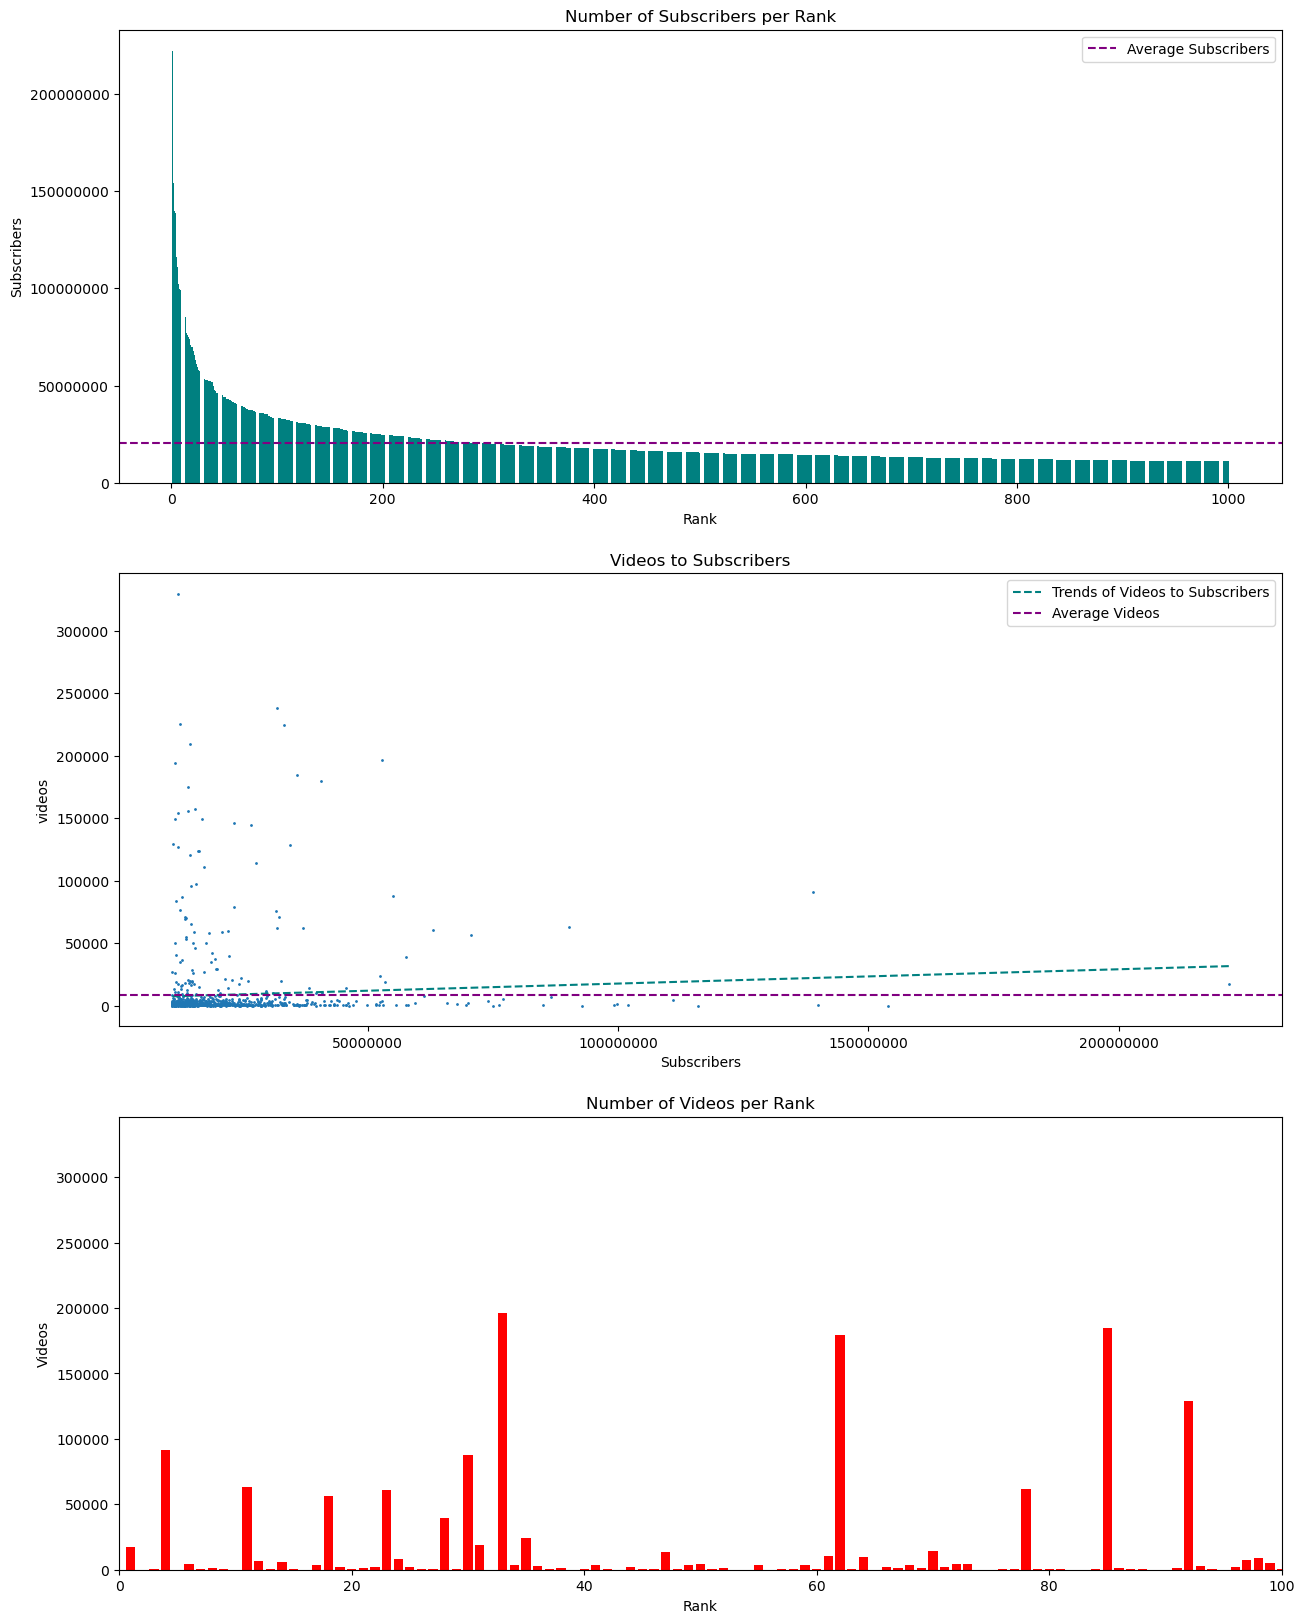

In [4]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(15,20))

rank = channels_data['Rank']
videos = channels_data['Videos']
subscribers = channels_data['Subscribers']

ax1.bar(rank, subscribers, color='teal')
ax1.ticklabel_format(style='plain')
ax1.set_title("Number of Subscribers per Rank")
ax1.set_xlabel("Rank")
ax1.set_ylabel("Subscribers")
ax1.axhline(np.nanmean(subscribers), color="purple", linestyle="--", label="Average Subscribers")
ax1.legend(loc="upper right")

ax2.scatter(subscribers, videos, s=1)
ax2.ticklabel_format(style='plain')
ax2.set_title("Videos to Subscribers")
ax2.set_xlabel("Subscribers")
ax2.set_ylabel("videos")
z = np.polyfit(subscribers, videos, 1)
p = np.poly1d(z)
ax2.plot(subscribers, p(subscribers), linestyle="--", color="teal", label="Trends of Videos to Subscribers")
ax2.axhline(np.nanmean(videos), color="purple", linestyle="--", label="Average Videos")
ax2.legend(loc="upper right")

ax3.bar(rank, videos, color='red')
ax3.set_xlim([0, 100])
ax3.set_title("Number of Videos per Rank")
ax3.set_xlabel("Rank")
ax3.set_ylabel("Videos")
plt.show()

## Rank Calculator

As a company, we try our best to be as accurate as possible when helping you set your goals. Here we have our calculator which we've developed to help you set your goals and know approximately what your rank would be.

In [5]:
calculator_mode = input("""
How would you like to calculate your rank? Please type in a number:

1) Calculate rank by number of subscribers
2) Calculate rank by number of videos and subscribers
3) Close calculator

""")

if int(calculator_mode) == 2:
    vids = input("How many videos do you have currently or do you want to have by the end of the year? ")
    subsc = input("How many subscribers do you have currently or do you want to have by the end of the year? ")

    try:
        vids = float(vids)
        subsc = float(subsc)

    except:
        print ("One or more of the provided values are not numbers. Please refresh the page and try again later.")


    try:

        user_input = np.array([[subsc, vids]])

        rnk = less_columns_model.predict(user_input)

        rnk = int(rnk)

        if rnk >=999:
            print("Based on your input, your rank would be 1000 or more.")
        else:
            print ("Based on your input, your rank would be " + str(rnk + 1) + ".")

        if rnk > 750:
            print("We recommend making more videos or getting more subscribers as you would be below rank 750.")
        else:
            print("That's a good goal! You would be above rank 750.")

        print ("This was calculated with " + str(accuracy) + "% accuracy.")
        print("Process completed. Please refresh page to calculate another value.")

    except:
        print("Something went wrong. Please refresh the page and try again.")
        
elif int(calculator_mode)  == 3:
    print ("Thank you for using the Rank Calculator. Have a nice day! If you need to calculate again, please refresh the page.")
    
elif int(calculator_mode) == 1:
    subsc = input("How many subscribers do you have currently or do you want to have by the end of the year? ")
    
    rnk = subscriber_model.predict([[subsc]])
    rnk = int(rnk)

    if rnk >=996:
        print("Based on your input, your rank would be 995 or more.")
    else:
        print ("Based on your input, your rank would be " + str(rnk) + ".")
        
    if rnk > 750:
        print("We recommend trying for more subscribers as you would be below rank 750.")
    else:
        print("That's a good goal! You would be above rank 750.")

    print ("This was calculated with " + str(accuracy2) + "% accuracy.")
    print("Process completed. Please refresh page to calculate another value.")


How would you like to calculate your rank? Please type in a number:

1) Calculate rank by number of subscribers
2) Calculate rank by number of videos and subscribers
3) Close calculator

1
How many subscribers do you have currently or do you want to have by the end of the year? 100000000
Based on your input, your rank would be 7.
That's a good goal! You would be above rank 750.
This was calculated with 99.98997493679195% accuracy.
Process completed. Please refresh page to calculate another value.


### How is your rank calculated?

You might be wondering how we got this number. Our calculator was designed using a Random Forest Regressor algorithm and using the data from the top 1000 channels to create models which are over 99.997% accurate. When you input your values into the calculator, it compares it with trends in the data to give you an estimate of how you compare to other channels.

### How did we create our models?

Our models were created using SciKit Learn, Pandas, and NumPy, using Python 3.6.


#### Code for Rank by Videos and Subscribers Model:

`new_x = channels_data[["Subscribers", "Videos"]]` <br>
`new_y = channels_data["Rank"]`<br>
`new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.2)`<br>
`new_model = rfr()`<br>
`new_model.fit(new_x_train, new_y_train)`<br>
`new_model.score(new_x_test, new_y_test)`<br>

#### Code for Rank by Subscriber-Only Model:

`subsc_x = channels_data["Subscribers"]`<br>
`subsc_y = channels_data["Rank"]`<br>
`sub_x_train, sub_x_test, sub_y_train, sub_y_test = train_test_split(subsc_x, subsc_y, test_size=0.2)`<br>
`new_sub_x_test = []`<br>
`new_sub_x_train = []`<br>

`for i in sub_x_train:`<br>
`    new_sub_x.append([i])`<br>
`for i in sub_x_train:`<br>
`    new_sub_x.append([i])`<br>

`subsc_model = rfr()`<br>
`subsc_model.fit(new_sub_x_train, subsc_y_train)`<br>
`subsc_model.score(new_sub_x_test, sub_y_test)`<br>

***

                                   Copyright © Jacob Hewitson 2022. All rights reserved.